# 10-Transforming Data

In this notebook we do a few things with the [Adult Income Dataset](https://www.kaggle.com/uciml/adult-census-income) to illustrate working with relationships between variables.



In [1]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import seaborn as sns

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Load the data
# Data from here: https://github.com/joshrosson/NBASalaryPredictions
df_nba = pd.read_csv("./data/nba_stats.csv")
df_nba.head()

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1995,A.C. Green,6473000.00,SF,31,PHO,82,52,2687,311,617,0.50,43,127,0.34,268,490,0.55,251,343,0.73,194,475,669,127,55,31,114,146,916
1,1995,Aaron McKie,845000.00,SG,22,POR,45,20,827,116,261,0.44,11,28,0.39,105,233,0.45,50,73,0.69,35,94,129,89,36,16,39,97,293
2,1995,Aaron Swinson,nan,SF,24,PHO,9,0,51,10,18,0.56,0,0,nan,10,18,0.56,4,5,0.80,3,5,8,3,1,0,5,8,24
3,1995,Aaron Williams,nan,PF,23,MIL,15,0,72,8,24,0.33,0,1,0.00,8,23,0.35,8,12,0.67,5,14,19,0,2,6,7,14,24
4,1995,Acie Earl,1040000.00,C,24,BOS,30,3,208,26,68,0.38,0,0,nan,26,68,0.38,14,29,0.48,19,26,45,2,6,8,14,39,66


Is the data for NBA Salary skewed?  Why?

<AxesSubplot:ylabel='Frequency'>

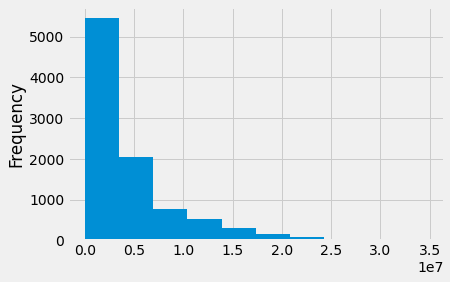

In [3]:
# Is the salary skewed?
df_nba['Salary'].plot.hist()

In [4]:
df_nba['Salary'].describe()

count       9354.00
mean     4398488.58
std      4704056.89
min         2706.00
25%      1164893.50
50%      2694582.00
75%      5760000.00
max     34682550.00
Name: Salary, dtype: float64

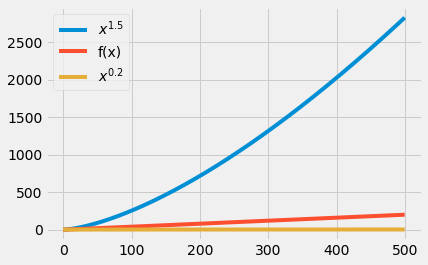

In [5]:
# Transformation functions..
x = np.linspace(0.0001, 200, 500)
plt.plot(x**1.5, label="$x^{1.5}$")
plt.plot(x**1, label="f(x)")
plt.plot(x**0.2, label="$x^{0.2}$")
#plt.plot(np.log(x), label="log(x)")
plt.legend(loc='best')

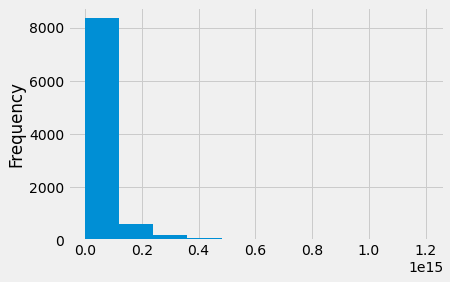

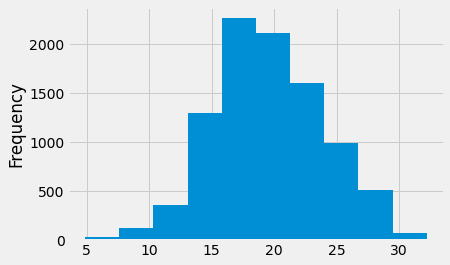

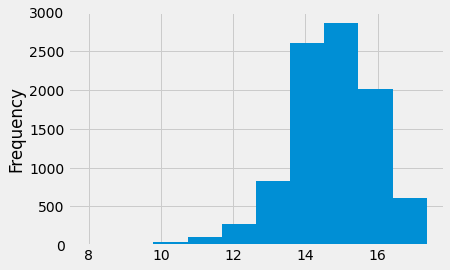

In [6]:
# Apply a few functions...
(df_nba['Salary']**2).plot.hist()
plt.show()
(df_nba['Salary']**0.2).plot.hist()
plt.show()
(np.log(df_nba['Salary'])).plot.hist()
plt.show()

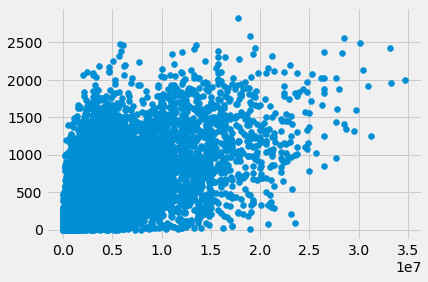

In [7]:
# Uskewing the data can help us to see relationships.
# Try 2, 1, 0.2

plt.scatter((df_nba['Salary']**1.0), df_nba['PTS'])

In [8]:
# Z-standardize and replot.
df_nba['std_salary'] = (df_nba['Salary'] - df_nba['Salary'].mean()) / df_nba['Salary'].std()
df_nba['std_pts'] = (df_nba['PTS'] - df_nba['PTS'].mean()) / df_nba['PTS'].std()


<AxesSubplot:xlabel='std_salary', ylabel='std_pts'>

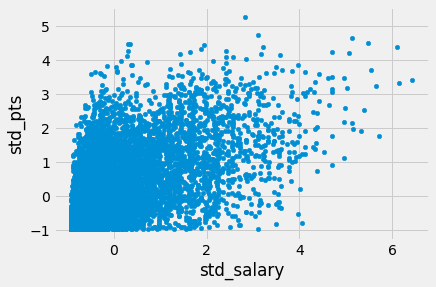

In [9]:
# Plot Salary v. Assists..
# Can see a bit more distribution and units are interpretable!
df_nba.plot.scatter(x='std_salary', y='std_pts')

In [10]:
# Compute the whole matrix..
df_nba.corr()

,Season,Salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,std_salary,std_pts
Season,1.00,0.24,-0.09,-0.01,-0.02,-0.03,-0.01,-0.01,0.03,0.10,0.11,0.05,-0.04,-0.05,0.08,-0.05,-0.06,0.03,-0.08,0.02,-0.01,-0.02,-0.05,-0.03,-0.06,-0.09,-0.00,0.24,-0.00
Salary,0.24,1.00,0.18,0.27,0.50,0.48,0.56,0.54,0.18,0.30,0.31,0.06,0.55,0.53,0.17,0.53,0.53,0.14,0.33,0.52,0.47,0.39,0.39,0.33,0.48,0.33,0.56,1.00,0.56
Age,-0.09,0.18,1.00,0.01,0.03,0.02,-0.02,-0.02,-0.01,0.04,0.03,0.05,-0.04,-0.04,-0.03,-0.04,-0.05,0.09,-0.04,0.02,0.00,0.05,0.00,-0.04,-0.03,-0.00,-0.02,0.18,-0.02
G,-0.01,0.27,0.01,1.00,0.65,0.87,0.75,0.75,0.29,0.49,0.51,0.09,0.71,0.72,0.28,0.63,0.64,0.20,0.62,0.73,0.71,0.58,0.73,0.48,0.74,0.87,0.74,0.27,0.74
GS,-0.02,0.50,0.03,0.65,1.00,0.87,0.83,0.82,0.24,0.47,0.49,0.07,0.81,0.81,0.22,0.74,0.75,0.16,0.62,0.78,0.75,0.66,0.75,0.52,0.80,0.75,0.82,0.50,0.82
MP,-0.03,0.48,0.02,0.87,0.87,1.00,0.93,0.94,0.27,0.61,0.63,0.12,0.89,0.90,0.26,0.83,0.83,0.25,0.66,0.84,0.81,0.74,0.87,0.53,0.90,0.88,0.93,0.48,0.93
FG,-0.01,0.56,-0.02,0.75,0.83,0.93,1.00,0.99,0.27,0.59,0.60,0.12,0.97,0.97,0.25,0.90,0.90,0.25,0.62,0.81,0.78,0.71,0.81,0.50,0.91,0.79,0.99,0.56,0.99
FGA,-0.01,0.54,-0.02,0.75,0.82,0.94,0.99,1.00,0.21,0.64,0.67,0.15,0.94,0.96,0.21,0.89,0.88,0.28,0.57,0.78,0.73,0.74,0.83,0.45,0.92,0.78,0.99,0.54,0.99
FG%,0.03,0.18,-0.01,0.29,0.24,0.27,0.27,0.21,1.00,-0.00,-0.02,0.04,0.31,0.27,0.91,0.23,0.26,-0.04,0.37,0.33,0.35,0.10,0.18,0.31,0.23,0.33,0.25,0.18,0.25
3P,0.10,0.30,0.04,0.49,0.47,0.61,0.59,0.64,-0.00,1.00,0.99,0.41,0.37,0.40,0.07,0.47,0.41,0.32,0.01,0.30,0.22,0.58,0.59,-0.00,0.53,0.38,0.63,0.30,0.63


<AxesSubplot:>

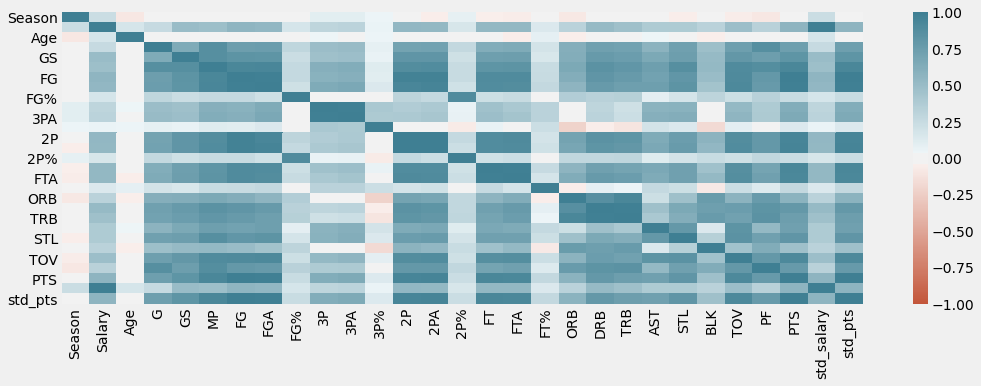

In [11]:
# Compute Some Cross Correlations...
plt.figure(figsize = (16,5))
sns.heatmap(df_nba.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

# Find the closest players!


In [12]:
# Get a smaller set, drop NA's and get dummies...
df_comp = df_nba[['Name', 'Pos', 'Salary', 'PTS', 'TRB']].copy()
df_comp.dropna(inplace=True)
df_comp.reset_index(drop=True, inplace=True)
df_comp

,Name,Pos,Salary,PTS,TRB
0,A.C. Green,SF,6473000.00,916,669
1,Aaron McKie,SG,845000.00,293,129
2,Acie Earl,C,1040000.00,66,45
3,Adam Keefe,SF,1650000.00,461,327
4,Adrian Caldwell,PF,225000.00,5,10
...,...,...,...,...,...
9349,Yogi Ferrell,PG,1312611.00,54,12
9350,Yogi Ferrell,PG,1312611.00,408,99
9351,Zach LaVine,SG,3202217.00,889,159
9352,Zach Randolph,PF,12307692.00,1028,598


In [13]:
# get dummies
df_ml = pd.get_dummies(df_comp[['Pos', 'Salary', 'PTS', 'TRB']])
df_ml

,Salary,PTS,TRB,Pos_C,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF
0,6473000.00,916,669,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,845000.00,293,129,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1040000.00,66,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1650000.00,461,327,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,225000.00,5,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349,1312611.00,54,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9350,1312611.00,408,99,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9351,3202217.00,889,159,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9352,12307692.00,1028,598,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


We're going to start using [SKLearn](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) we'll get more into it as we go!

In [14]:
# Use SKLEARN to do soe distances.
from sklearn.metrics import pairwise_distances
D = pairwise_distances(df_ml, metric="euclidean")
D.shape

(9354, 9354)

In [15]:
# Find someone intersting...
df_comp[(df_comp['Name'] == 'Anthony Davis')]

,Name,Pos,Salary,PTS,TRB
6995,Anthony Davis,PF,5375760.00,867,522
7406,Anthony Davis,PF,5607240.00,1394,673
7878,Anthony Davis,PF,7070730.00,1656,696
8416,Anthony Davis,C,22116750.00,1481,627
8892,Anthony Davis,C,23775506.00,2099,886


In [16]:
D[8416, :]

array([15643750.0102594 , 21271750.03900361, 21076750.05553392, ...,
       18914533.0150543 ,  9809058.01050315, 18639150.03112036])

In [17]:
# Whose the closest
D[8416, :].argmin()

8416

In [18]:
# Wait... that's me...
np.fill_diagonal(D, np.inf)

In [19]:
D[8416, :].argmin()

8547

In [20]:
df_comp.loc[8547]

Name      Hassan Whiteside
Pos                      C
Salary         22116750.00
PTS                   1040
TRB                    865
Name: 8547, dtype: object

## Probability and Code!

Note we're using [Numpy's probability functions](https://numpy.org/doc/stable/reference/random/index.html), you could also use [Python's](https://docs.python.org/3/library/random.html)

In [21]:
# Let's make a probability distribution:
outcomes = list(range(1,7))
outcomes

[1, 2, 3, 4, 5, 6]

In [43]:
#Simulate an outcome..
np.random.choice(outcomes)

3

In [56]:
# Do it a lot...
np.random.choice(outcomes, 20)

array([5, 6, 6, 5, 2, 4, 6, 4, 2, 6, 5, 2, 5, 4, 3, 4, 5, 2, 1, 4])

<AxesSubplot:ylabel='Frequency'>

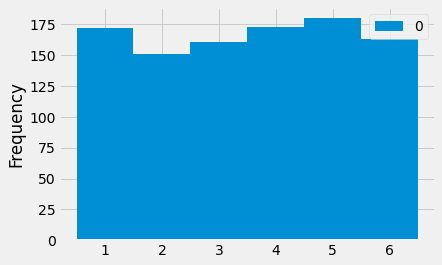

In [72]:
# Graph it!
results = pd.DataFrame(np.random.choice(outcomes, 1000))
results.plot.hist(bins=np.arange(0.5,7.5, 1))

<AxesSubplot:ylabel='Frequency'>

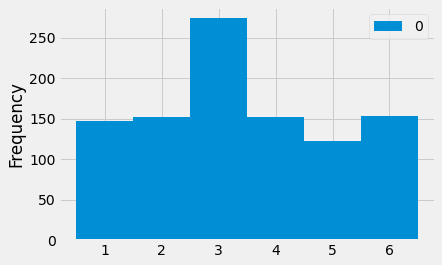

In [91]:
# Do it with a biased coin..
b = 1.0 / 7.0
b1 = 2.0 / 7.0
results = pd.DataFrame(np.random.choice(outcomes, 1000, p=[b, b, b1, b, b, b]))
results.plot.hist(bins=np.arange(0.5,7.5, 1))

In [110]:
# Do it for multiple events!
die1 = np.random.choice(outcomes, 10000)
die2 = np.random.choice(outcomes, 10000)
results = pd.DataFrame({'Die1': die1, 'Die2':die2})
results.head()

,Die1,Die2
0,5,4
1,6,6
2,4,1
3,6,2
4,5,5


<AxesSubplot:ylabel='Frequency'>

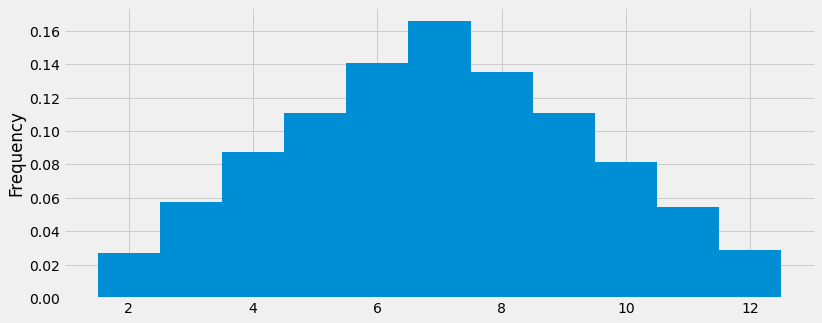

In [111]:
# Need to add them up...
plt.figure(figsize = (12,5))
results['sum'] = results["Die1"] + results["Die2"]
results['sum'].plot.hist(bins=np.arange(1.5, 13.5, 1), density=True)

In [112]:
# Default is with replacement but we can do without replacement..
people = ['Winona', 'Xanthippe', 'Yvonne', 'Zelda']
np.random.choice(people, 3, replace=False)

array(['Zelda', 'Yvonne', 'Xanthippe'], dtype='<U9')

## Looking at Two Variables.

Let's roll two dice a bunch of times and see the resutls.


In [ ]:
die1 = np.random.choice(outcomes, 100)
die2 = np.random.choice(outcomes, 100)
results = pd.DataFrame({'Die1': die1, 'Die2':die2})

In [ ]:
counts = pd.crosstab(results['Die1'], results['Die2'])
counts

In [ ]:
joint = pd.crosstab(results['Die1'], results['Die2'], normalize=True)
joint

In [ ]:
# Now we can roll this up for either die to see it's distribution
joint.sum(axis=0)

In [ ]:
# Can also get marginals directly.
marginals = pd.crosstab(results['Die1'], results['Die2'], normalize=True, margins=True)
marginals

In [ ]:
# Finally, if we want conditional distributions we have to do a bit of work. Let's try to work out
# P(Die 1 is a 6 | Die 2 is a 5)

counts = pd.crosstab(results['Die1'], results['Die2'])
counts

In [ ]:
# We need to get the (Die 2 is a 5 row) and then look at the distribution there..

counts[5] / counts[5].sum()

## Using Simulation to Answer Probability Questions.

In CMPS 2170 we figured out closed form formulas for a set of mutually independent Bernoilli Trials.

* Bernoulli Trial: an experiment with two possible outcomes
* E.g., flip a coin results in two possible outcomes: head (𝐻) and tail (𝑇)
* Independent Bernoulli Trials: a sequence of Bernoulli trails that are mutually independent

* Example: What is the probability of the sequence HHHTT for a coin flip sequence with $p$ for H and $1-p$ for T? -- $p^3(1-p)^2$.

Recall: The probability of exactly $k$ successes in $n$ independent Bernoulli trials, with probability of success $p$ and probability of failure $q = 1 − p$, is $C(n,k)p^kq^{n-k}$ where $C(n,k)$ is $n$ choose $k$.

In [ ]:
# Setup a biased coin and flip it a bunch..
coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.75, 0.25])
coin_results

## A More complex Question..

* What is the probability of getting 60 or more heads if I flip 100 coins?
* Approximation through simulation:
  1. Figure out how to do one experiment (i.e., flip 100 coins).
  2. Run the experiment a bunch of times.
  3. Find the fraction of times where number of heads >= 60.

In [ ]:
# Flip 100 coins and count heads...
coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.75, 0.25])
print(coin_results == 'Heads')
print(np.count_nonzero(coin_results == 'Heads'))


In [ ]:
# Wrap it up and do it a bunch...
# Note we're using Numpy here for broadcasting -- numpy arrays are imuteable so 
# it's a tad more akaward in places..
n_reps = 10000

def exp():
    coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.75, 0.25])
    return np.count_nonzero(coin_results == 'Heads')

head_counts = np.array([])
for i in range(n_reps):
    head_counts = np.append(head_counts, exp())

In [ ]:
# Figure it out...
print(np.count_nonzero(head_counts >= 60))
print(np.count_nonzero(head_counts >= 60) / n_reps)

If we work out the math we need at least 60 H so we have to add up quite a few things...
$\sum^{100}_{k=60} C(100, k)p^kq^n-k$

In [ ]:
# Using simiulation we can also look at the trials.

head_counts = np.array([])
for i in range(n_reps):
    head_counts = np.append(head_counts, exp())

results = pd.DataFrame(head_counts)
results.plot.hist()

## Settle the Monty Hall Thing...

In [ ]:
def simulate_monty_hall():
    behind_picked_door = np.random.choice(['Car', 'Goat 1', 'Goat 2'])
    
    if behind_picked_door == 'Car':
        winning_strategy = 'Stay'
    else:
        winning_strategy = 'Switch'
        
    print(behind_picked_door, 'was behind the door. Winning strategy:', winning_strategy)
    return winning_strategy
simulate_monty_hall()

In [ ]:
# Run it a bunch...
n_repetitions = 10000

winning_strategies = np.array([])
for i in np.arange(n_repetitions):
    winning_strategy = simulate_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)


In [ ]:
np.count_nonzero(winning_strategies == 'Switch') / n_repetitions

In [ ]:
np.count_nonzero(winning_strategies == 'Stay') / n_repetitions